In [1]:
import pandas as pd


In [2]:
df2 = pd.read_csv('classify_competitors_1.csv')

In [3]:
import pandas as pd

# Assuming your CSV file is named 'data.csv' and is located in the current directory
df = pd.read_csv('mntdata.csv', names=['Company Name', 'Stand Info', 'Country', 'Description', 'Skills'])

# Print the DataFrame to verify
print(df)


                    Company Name                            Stand Info  \
0                   Company Name                            Stand Info   
1                01Talent Africa  Stand No - 14A-16, Hall No - Hall 14   
2     212 Founders by CDG Invest    Stand No - 9A-10, Hall No - Hall 9   
3                     3GCOM SARL  Stand No - 12C-61, Hall No - Hall 12   
4                     3labal.App    Stand No - 9D-23, Hall No - Hall 9   
...                          ...                                   ...   
1227                     VTC/VTL    Stand No - 8P-33, Hall No - Hall 8   
1228                   W-All Fit  Stand No - 13B-10, Hall No - Hall 13   
1229                       Weego  Stand No - 18B-48, Hall No - Hall 18   
1230         Workpay Africa Ltd.  Stand No - 18B-46, Hall No - Hall 18   
1231                         Yux     Stand No - 2A-9, Hall No - Hall 2   

       Country                                        Description  \
0      Country                            

In [4]:
df

,Company Name,Stand Info,Country,Description,Skills
0,Company Name,Stand Info,Country,Description,Skills
1,01Talent Africa,"Stand No - 14A-16, Hall No - Hall 14",Portugal,01Talent Africa is both a Talent factory and a...,"Gaming, Education Tech, Cyber security, Coding..."
2,212 Founders by CDG Invest,"Stand No - 9A-10, Hall No - Hall 9",Morocco,212 Founders is an acceleration and investment...,"Digital Finance, Incubator/Accelerator/Investm..."
3,3GCOM SARL,"Stand No - 12C-61, Hall No - Hall 12",Morocco,One of the leading global system integrator fo...,No categories available
4,3labal.App,"Stand No - 9D-23, Hall No - Hall 9",Morocco,"Since its creation in 2010, Khatwa Partners ha...",Incubator/Accelerator/Investment
...,...,...,...,...,...
1227,VTC/VTL,"Stand No - 8P-33, Hall No - Hall 8",Morocco,No description available,No categories available
1228,W-All Fit,"Stand No - 13B-10, Hall No - Hall 13",Morocco,No description available,No categories available
1229,Weego,"Stand No - 18B-48, Hall No - Hall 18",Morocco,No description available,No categories available
1230,Workpay Africa Ltd.,"Stand No - 18B-46, Hall No - Hall 18",Kenya,No description available,No categories available


In [5]:
import pandas as pd

# Assuming `df` is your DataFrame

# First, let's create a list of African countries
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

# Now, we can filter the DataFrame using the `loc` method
filtered_df = df.loc[df['Country'].isin(african_countries)]

# The `filtered_df` DataFrame now only contains rows with African countries

In [6]:
import pandas as pd
import spacy
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


# Load spaCy model
nlp = spacy.load('en_core_web_sm')

def extract_key_concepts(text):
    """
    Extract key concepts from a given text using spaCy.
    """
    doc = nlp(text)
    keywords = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(keywords)

def calculate_similarity(text1, text2):
    """
    Calculate cosine similarity between two texts.
    """
    vectorizer = CountVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    cos_sim = cosine_similarity(vectors)
    return cos_sim[0, 1]

def compare_companies(df, target_description):
    """
    Compare each company description in the DataFrame with the target description.
    """
    target_concepts = extract_key_concepts(target_description)
    
    # Apply extraction of key concepts to all company descriptions
    df.loc[:, 'key_concepts'] = df['Description'].astype(str).apply(extract_key_concepts)
    
    # Calculate similarity scores
    df.loc[:, 'similarity_score'] = df['key_concepts'].apply(lambda x: calculate_similarity(x, target_concepts))
    
    # Sort companies by similarity score in descending order
    df_sorted = df.sort_values(by='similarity_score', ascending=False)
    
    return df_sorted



# Target company description
target_description = "Dyn IT Maroc offers a range of services focused on digital transformation and artificial intelligence."

# Compare companies
df_sorted = compare_companies(filtered_df, target_description)

print(df_sorted[['Company Name', 'similarity_score']])


C:\Users\PAVILION\AppData\Local\Temp\ipykernel_21308\471396424.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'key_concepts'] = df['Description'].astype(str).apply(extract_key_concepts)


                   Company Name  similarity_score
299                DYN IT MAROC          0.408248
725                 NUMERIC WAY          0.306786
1202                   Sahl Pay          0.293198
703                        NGBS          0.285133
24                  AFRIC'TRUST          0.278887
...                         ...               ...
717                    Nsayblik          0.000000
734                       OKEYO          0.000000
745                  OPENSCHOOL          0.000000
753   Organic Route 'U' Limited          0.000000
1231                        Yux          0.000000

[655 rows x 2 columns]


C:\Users\PAVILION\AppData\Local\Temp\ipykernel_21308\471396424.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'similarity_score'] = df['key_concepts'].apply(lambda x: calculate_similarity(x, target_concepts))


In [7]:
df_sorted

,Company Name,Stand Info,Country,Description,Skills,key_concepts,similarity_score
299,DYN IT MAROC,"Stand No - 4B-25, Hall No - Hall 4",Morocco,Dyn IT Maroc offre une gamme de services axés ...,"Education Tech, Cloud Services, Big Data & Ana...",dyn Maroc offre une gamme de service axés sur ...,0.408248
725,NUMERIC WAY,"Stand No - 4A-2, Hall No - Hall 4",Morocco,NUMERIC WAY is a global partner in digital tra...,"Digital Finance, Retail Tech, Ecommerce, Codin...",NUMERIC WAY global partner digital transformat...,0.306786
1202,Sahl Pay,"Stand No - 18C-49, Hall No - Hall 18",Egypt,"Founded in 2019, Sahl initially launched as a ...","Digital Finance, E-Commerce Solutions, E-Payme...",found 2019 Sahl initially launch digital payme...,0.293198
703,NGBS,"Stand No - 5D-50, Hall No - Hall 5",Morocco,NGBS is a company specialized in engineering a...,"Future Mobility & Transportation, Cloud Servic...",NGBS company specialize engineering digital se...,0.285133
24,AFRIC'TRUST,"Stand No - 19C-55, Hall No - Hall 19",Morocco,"Launched in 2022, AfricTrust is the only natio...","Cyber security, Authentication User, Biometric...",launch 2022 AfricTrust national accredit priva...,0.278887
...,...,...,...,...,...,...,...
717,Nsayblik,"Stand No - 9K-1, Hall No - Hall 9",Morocco,Nsayblik is a tech company that enables indivi...,No categories available,Nsayblik tech company enable individual compan...,0.000000
734,OKEYO,"Stand No - 21H-20, Hall No - Hall 21",Morocco,"OKEYO is an innovative marketplace app, where ...",No categories available,OKEYO innovative marketplace app shopping meet...,0.000000
745,OPENSCHOOL,"Stand No - 8C-10, Hall No - Hall 8",Morocco,OPENSCHOOL is an edtech startup founded by hig...,"Software Services, Education Tech, Artificial ...",OPENSCHOOL edtech startup found highly experie...,0.000000
753,Organic Route 'U' Limited,"Stand No - 8P-10, Hall No - Hall 8",Uganda,Organic Route is a technology-driven food proc...,"AgriTech & FoodTech, Climate-Smart Agriculture...",Organic Route technology drive food processor ...,0.000000


In [8]:
# Filter companies with similarity score > 0
filtered_df = df_sorted[df_sorted['similarity_score'] > 0]

print("Companies with similarity score > 0:")
filtered_df[['Company Name', 'similarity_score']]

Companies with similarity score > 0:


,Company Name,similarity_score
299,DYN IT MAROC,0.408248
725,NUMERIC WAY,0.306786
1202,Sahl Pay,0.293198
703,NGBS,0.285133
24,AFRIC'TRUST,0.278887
...,...,...
97,AUTOMATIC ID,0.019920
827,RED INNOV,0.019104
992,TELEDYNE,0.018634
648,MCS Engineering,0.016976


In [9]:
# Add a new column 'compatibility_rank' with ranks
filtered_df.loc[:, 'compatibility_rank'] = filtered_df['similarity_score'].rank(method='dense', ascending=False).astype(int)

filtered_df[['Company Name', 'similarity_score', 'compatibility_rank']]

C:\Users\PAVILION\AppData\Local\Temp\ipykernel_21308\3227810783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'compatibility_rank'] = filtered_df['similarity_score'].rank(method='dense', ascending=False).astype(int)


,Company Name,similarity_score,compatibility_rank
299,DYN IT MAROC,0.408248,1
725,NUMERIC WAY,0.306786,2
1202,Sahl Pay,0.293198,3
703,NGBS,0.285133,4
24,AFRIC'TRUST,0.278887,5
...,...,...,...
97,AUTOMATIC ID,0.019920,315
827,RED INNOV,0.019104,316
992,TELEDYNE,0.018634,317
648,MCS Engineering,0.016976,318


In [10]:
filtered_df

,Company Name,Stand Info,Country,Description,Skills,key_concepts,similarity_score,compatibility_rank
299,DYN IT MAROC,"Stand No - 4B-25, Hall No - Hall 4",Morocco,Dyn IT Maroc offre une gamme de services axés ...,"Education Tech, Cloud Services, Big Data & Ana...",dyn Maroc offre une gamme de service axés sur ...,0.408248,1
725,NUMERIC WAY,"Stand No - 4A-2, Hall No - Hall 4",Morocco,NUMERIC WAY is a global partner in digital tra...,"Digital Finance, Retail Tech, Ecommerce, Codin...",NUMERIC WAY global partner digital transformat...,0.306786,2
1202,Sahl Pay,"Stand No - 18C-49, Hall No - Hall 18",Egypt,"Founded in 2019, Sahl initially launched as a ...","Digital Finance, E-Commerce Solutions, E-Payme...",found 2019 Sahl initially launch digital payme...,0.293198,3
703,NGBS,"Stand No - 5D-50, Hall No - Hall 5",Morocco,NGBS is a company specialized in engineering a...,"Future Mobility & Transportation, Cloud Servic...",NGBS company specialize engineering digital se...,0.285133,4
24,AFRIC'TRUST,"Stand No - 19C-55, Hall No - Hall 19",Morocco,"Launched in 2022, AfricTrust is the only natio...","Cyber security, Authentication User, Biometric...",launch 2022 AfricTrust national accredit priva...,0.278887,5
...,...,...,...,...,...,...,...,...
97,AUTOMATIC ID,"Stand No - 6B-50, Hall No - Hall 6",Morocco,Automatic ID est une société d’ingénierie info...,"Retail Tech, Quantum & High Performance Comput...",automatic ID est une société d’ingénierie info...,0.019920,315
827,RED INNOV,"Stand No - 5E-05, Hall No - Hall 5",Morocco,"RED INNOV, une société novatrice rassemblant d...","Smart Cities, PropTech, Media, Marketing & Adv...",RED INNOV une société novatrice rassemblant di...,0.019104,316
992,TELEDYNE,"Stand No - 15A-8, Hall No - Hall 15",Morocco,Nos produits couvrent diverses infrastructures...,"Networking & Infrastructure, Internet of Thing...",Nos produit couvrent diverse infrastructure ro...,0.018634,317
648,MCS Engineering,"Stand No - 5D-50, Hall No - Hall 5",Morocco,"Créée en 2004, MCS ENGINEERING a réussi le par...","Internet of Things (IOT), Ecommerce, Big Data ...",créée en 2004 MCS ENGINEERING réussi le pari d...,0.016976,318


In [11]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

def extract_key_concepts(text):
    """
    Extract key concepts from a given text using spaCy.
    """
    doc = nlp(text)
    keywords = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(keywords)

def calculate_similarity(text1, text2):
    """
    Calculate cosine similarity between two texts.
    """
    vectorizer = CountVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    cos_sim = cosine_similarity(vectors)
    return cos_sim[0, 1]

def compare_companies(df, target_description, target_skills):
    """
    Compare each company description and skills in the DataFrame with the target description and skills.
    """
    target_concepts = extract_key_concepts(target_description)
    
    # Apply extraction of key concepts to all company descriptions
    df['key_concepts'] = df['Description'].astype(str).apply(extract_key_concepts)
    
    # Calculate similarity scores for descriptions
    df['similarity_score_desc'] = df['key_concepts'].apply(lambda x: calculate_similarity(x, target_concepts))
    
    # Calculate similarity scores for skills
    df['similarity_score_skills'] = df['Skills'].astype(str).apply(lambda x: calculate_similarity(x, target_skills))
    
    # Combine similarity scores
    df['overall_similarity_score'] = df['similarity_score_desc'] * df['similarity_score_skills']
    
    # Filter companies with overall similarity score > 0
    filtered_df = df[df['overall_similarity_score'] >= 0]
    
    # Rank companies based on overall similarity score
    filtered_df.loc[:, 'compatibility_rank'] = filtered_df['overall_similarity_score'].rank(method='dense', ascending=False).astype(int)
    
    # Sort companies by compatibility rank
    filtered_df_sorted = filtered_df.sort_values(by='compatibility_rank')
    
    return filtered_df_sorted


# Target company description and skills
target_description = "Dyn IT Maroc offers a range of services focused on digital transformation and artificial intelligence."
target_skills = "Education Tech, Cloud Services, Big Data & Analytics, Artificial Intelligence, Chatbots / Virtual Assistant, Computer Vision, Data Extraction, Deep Learning Platforms, Facial / Iris Recognition, Machine Learning, Natural Language Processing (NLP), Neural Networks, Optical character recognition (OCR), Predictive APIs, Real time translation, Speech Recognition, Business Intelligence, Cloud Solutions, Dashboard, Data Analytics, Data Architecture, Data Integration, Data Lake, Data Management, Data Science, Data Visualisation, Data Warehouse, DataOps, Devops, Extract, transform, load - ETL, Machine Learning, Natural Language Processing - NLP, Structured Query Language - SQL, Data as a Service - DAAS, DevOps, Training or Recruitement, Learning strategy, Training centre resources"

# Compare companies
result_df = compare_companies(df_sorted, target_description, target_skills)

print(result_df[['Company Name', 'overall_similarity_score', 'compatibility_rank']])


                    Company Name  overall_similarity_score  compatibility_rank
299                 DYN IT MAROC                  0.408248                   1
703                         NGBS                  0.165602                   2
610                    LOGIGROUP                  0.138914                   3
171                      Casanet                  0.119308                   4
984     TEAL Technology Services                  0.109594                   5
...                          ...                       ...                 ...
254                  DeepLeaf.io                  0.000000                 254
131                     Biker.ma                  0.000000                 254
525           IWOMI TECHNOLOGIES                  0.000000                 254
36    Agence Nationale des Ports                  0.000000                 254
1231                         Yux                  0.000000                 254

[655 rows x 3 columns]


In [12]:
result_df[['Company Name', 'overall_similarity_score', 'compatibility_rank', 'similarity_score_skills']]

,Company Name,overall_similarity_score,compatibility_rank,similarity_score_skills
299,DYN IT MAROC,0.408248,1,1.000000
703,NGBS,0.165602,2,0.580788
610,LOGIGROUP,0.138914,3,0.654849
171,Casanet,0.119308,4,0.577991
984,TEAL Technology Services,0.109594,5,0.748668
...,...,...,...,...
254,DeepLeaf.io,0.000000,254,0.000000
131,Biker.ma,0.000000,254,0.000000
525,IWOMI TECHNOLOGIES,0.000000,254,0.000000
36,Agence Nationale des Ports,0.000000,254,0.000000


In [13]:
# Sort companies by overall similarity score in ascending order to find the least compatible
least_compatible_df = result_df.sort_values(by='overall_similarity_score', ascending=True)

least_compatible_df[['Company Name', 'overall_similarity_score', 'compatibility_rank']]

,Company Name,overall_similarity_score,compatibility_rank
915,SMART SYSTEM SERVICES,0.000000,254
107,AZA Petrosolutions,0.000000,254
105,AYNI,0.000000,254
88,ATAREC,0.000000,254
435,hany&Zen / kounhany,0.000000,254
...,...,...,...
984,TEAL Technology Services,0.109594,5
171,Casanet,0.119308,4
610,LOGIGROUP,0.138914,3
703,NGBS,0.165602,2


In [14]:
# Filter companies with overall similarity score 0.1 or less
filtered_least_compatible_df = least_compatible_df[least_compatible_df['overall_similarity_score'] <= 0.1]

# Add a new column 'compatibility_rank' with ranks for the least compatible companies
filtered_least_compatible_df.loc[:, 'uncompatibility_rank'] = filtered_least_compatible_df['overall_similarity_score'].rank(method='dense', ascending=True).astype(int)

# Sort the DataFrame by compatibility_rank
filtered_least_compatible_df_sorted = filtered_least_compatible_df.sort_values(by='uncompatibility_rank')

# Display the DataFrame with the required columns
filtered_least_compatible_df_sorted[['Company Name', 'Stand Info', 'Country', 'Description', 'Skills', 'overall_similarity_score', 'uncompatibility_rank']]


C:\Users\PAVILION\AppData\Local\Temp\ipykernel_21308\2871594011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_least_compatible_df.loc[:, 'uncompatibility_rank'] = filtered_least_compatible_df['overall_similarity_score'].rank(method='dense', ascending=True).astype(int)


,Company Name,Stand Info,Country,Description,Skills,overall_similarity_score,uncompatibility_rank
915,SMART SYSTEM SERVICES,"Stand No - 7A-20, Hall No - Hall 7",Mauritania,Smart System Services specializes in integrate...,No categories available,0.000000,1
1094,Zedvance Finance,"Stand No - 21A-4, Hall No - Hall 21",Nigeria,"Zedvance Finance Limited offers SME loans, per...",No categories available,0.000000,1
766,Peelo,"Stand No - 8H-09, Hall No - Hall 8",Senegal,Peelo tackles language barriers in African mar...,No categories available,0.000000,1
49,ALABASTER AGRO-ALLIED INDUSTRIES LIMITED,"Stand No - 8H-07, Hall No - Hall 8",Nigeria,KIPITFRESH provides mobile cold chain as a ser...,No categories available,0.000000,1
389,Garista,"Stand No - 21E-02, Hall No - Hall 21",Morocco,Garista offers a revolutionary cloud-based Saa...,No categories available,0.000000,1
...,...,...,...,...,...,...,...
949,ST DIGITAL,"Stand No - 9L-31,9L-32, Hall No - Hall 9",Cameroon,ST DIGITAL est une société de services numériq...,"Software Services, Data Centres, Cyber securit...",0.089581,240
822,Ratnafy,"Stand No - 9L-27, 9L-28, Hall No - Hall 9",Tunisia,Our company specializes in 360° AI-Driven Mark...,"Digital Finance, Creative Economy, Media, Mark...",0.092698,241
1007,TOUCH AND PAY TECHNOLOGIES LIMITED,"Stand No - 8C-02, Hall No - Hall 8",Nigeria,Touch and Pay Technologies Limited is a passio...,"Big Data & Analytics, Data Analytics",0.092748,242
634,MAROC DATACENTER - MDC,"Stand No - 12B-60, Hall No - Hall 12",Morocco,MDC is a Moroccan company that provides exclus...,"Data Centres, Co-location, Consultancy, Data B...",0.094741,243


In [15]:
filtered_least_compatible_df_sorted

,Company Name,Stand Info,Country,Description,Skills,key_concepts,similarity_score,similarity_score_desc,similarity_score_skills,overall_similarity_score,compatibility_rank,uncompatibility_rank
915,SMART SYSTEM SERVICES,"Stand No - 7A-20, Hall No - Hall 7",Mauritania,Smart System Services specializes in integrate...,No categories available,Smart System Services specialize integrate was...,0.000000,0.000000,0.000000,0.000000,254,1
1094,Zedvance Finance,"Stand No - 21A-4, Hall No - Hall 21",Nigeria,"Zedvance Finance Limited offers SME loans, per...",No categories available,Zedvance Finance Limited offer SME loan person...,0.081650,0.081650,0.000000,0.000000,254,1
766,Peelo,"Stand No - 8H-09, Hall No - Hall 8",Senegal,Peelo tackles language barriers in African mar...,No categories available,Peelo tackle language barrier african market o...,0.079057,0.079057,0.000000,0.000000,254,1
49,ALABASTER AGRO-ALLIED INDUSTRIES LIMITED,"Stand No - 8H-07, Hall No - Hall 8",Nigeria,KIPITFRESH provides mobile cold chain as a ser...,No categories available,KIPITFRESH provide mobile cold chain service s...,0.079057,0.079057,0.000000,0.000000,254,1
389,Garista,"Stand No - 21E-02, Hall No - Hall 21",Morocco,Garista offers a revolutionary cloud-based Saa...,No categories available,Garista offer revolutionary cloud base SaaS pl...,0.077267,0.077267,0.000000,0.000000,254,1
...,...,...,...,...,...,...,...,...,...,...,...,...
949,ST DIGITAL,"Stand No - 9L-31,9L-32, Hall No - Hall 9",Cameroon,ST DIGITAL est une société de services numériq...,"Software Services, Data Centres, Cyber securit...",st DIGITAL est une société de service numériqu...,0.190693,0.190693,0.469767,0.089581,15,240
822,Ratnafy,"Stand No - 9L-27, 9L-28, Hall No - Hall 9",Tunisia,Our company specializes in 360° AI-Driven Mark...,"Digital Finance, Creative Economy, Media, Mark...",company specialize 360 ° AI drive Marketing So...,0.223607,0.223607,0.414557,0.092698,14,241
1007,TOUCH AND PAY TECHNOLOGIES LIMITED,"Stand No - 8C-02, Hall No - Hall 8",Nigeria,Touch and Pay Technologies Limited is a passio...,"Big Data & Analytics, Data Analytics",touch Pay Technologies Limited passionate new ...,0.160644,0.160644,0.577350,0.092748,13,242
634,MAROC DATACENTER - MDC,"Stand No - 12B-60, Hall No - Hall 12",Morocco,MDC is a Moroccan company that provides exclus...,"Data Centres, Co-location, Consultancy, Data B...",mdc moroccan company provide exclusive Datacen...,0.152854,0.152854,0.619810,0.094741,12,243


In [16]:
filtered_least_compatible_df_sorted[['Company Name', 'Stand Info', 'Country', 'Description', 'Skills', 'overall_similarity_score', 'uncompatibility_rank']]
filtered_df[['Company Name', 'Stand Info', 'Country', 'Description', 'Skills', 'similarity_score', 'compatibility_rank']]

,Company Name,Stand Info,Country,Description,Skills,similarity_score,compatibility_rank
299,DYN IT MAROC,"Stand No - 4B-25, Hall No - Hall 4",Morocco,Dyn IT Maroc offre une gamme de services axés ...,"Education Tech, Cloud Services, Big Data & Ana...",0.408248,1
725,NUMERIC WAY,"Stand No - 4A-2, Hall No - Hall 4",Morocco,NUMERIC WAY is a global partner in digital tra...,"Digital Finance, Retail Tech, Ecommerce, Codin...",0.306786,2
1202,Sahl Pay,"Stand No - 18C-49, Hall No - Hall 18",Egypt,"Founded in 2019, Sahl initially launched as a ...","Digital Finance, E-Commerce Solutions, E-Payme...",0.293198,3
703,NGBS,"Stand No - 5D-50, Hall No - Hall 5",Morocco,NGBS is a company specialized in engineering a...,"Future Mobility & Transportation, Cloud Servic...",0.285133,4
24,AFRIC'TRUST,"Stand No - 19C-55, Hall No - Hall 19",Morocco,"Launched in 2022, AfricTrust is the only natio...","Cyber security, Authentication User, Biometric...",0.278887,5
...,...,...,...,...,...,...,...
97,AUTOMATIC ID,"Stand No - 6B-50, Hall No - Hall 6",Morocco,Automatic ID est une société d’ingénierie info...,"Retail Tech, Quantum & High Performance Comput...",0.019920,315
827,RED INNOV,"Stand No - 5E-05, Hall No - Hall 5",Morocco,"RED INNOV, une société novatrice rassemblant d...","Smart Cities, PropTech, Media, Marketing & Adv...",0.019104,316
992,TELEDYNE,"Stand No - 15A-8, Hall No - Hall 15",Morocco,Nos produits couvrent diverses infrastructures...,"Networking & Infrastructure, Internet of Thing...",0.018634,317
648,MCS Engineering,"Stand No - 5D-50, Hall No - Hall 5",Morocco,"Créée en 2004, MCS ENGINEERING a réussi le par...","Internet of Things (IOT), Ecommerce, Big Data ...",0.016976,318


In [17]:
import pandas as pd

# Assuming filtered_least_compatible_df_sorted and filtered_df are already defined and have valid data

# Ensure filtered_least_compatible_df_sorted has data
filtered_least_compatible_df_sorted = filtered_least_compatible_df_sorted[['Company Name', 'Stand Info', 'Country', 'Description', 'Skills', 'overall_similarity_score', 'uncompatibility_rank']]


# Ensure filtered_df has data
filtered_df = filtered_df[['Company Name', 'Stand Info', 'Country', 'Description', 'Skills', 'similarity_score', 'compatibility_rank']]

# Exporting the DataFrames to an Excel file with two sheets
with pd.ExcelWriter('compatibility_scores.xlsx') as writer:
    # Check if there is data in the least compatible DataFrame
    if not filtered_least_compatible_df_sorted.empty:
        filtered_least_compatible_df_sorted.to_excel(writer, sheet_name='Least Compatible', index=False)
    else:
        # Create an empty DataFrame for the least compatible sheet if no data
        pd.DataFrame().to_excel(writer, sheet_name='Least Compatible', index=False)

    # Check if there is data in the compatible DataFrame
    if not filtered_df.empty:
        filtered_df.to_excel(writer, sheet_name='Compatible', index=False)
    else:
        # Create an empty DataFrame for the compatible sheet if no data
        pd.DataFrame().to_excel(writer, sheet_name='Compatible', index=False)

print("DataFrames have been successfully exported to 'compatibility_scores.xlsx'")


DataFrames have been successfully exported to 'compatibility_scores.xlsx'


   Echan.  Anhydrite  Gypse  Halite  Calcite  Aragonite  Dolomite  Log(PCO2)  \
0       1      -1.09  -0.84   -5.97     0.37       0.22      0.42      -2.51   
1       2      -1.61  -1.39   -6.80     0.09       0.23     -0.09      -1.51   
2       3      -1.16  -0.92   -5.67     0.83       0.68      1.50      -2.58   
3       4      -1.59  -1.35   -6.38     0.66       0.51      1.39      -2.70   
4       5      -1.13  -0.89   -5.40     0.56       0.41      0.95      -2.37   

     pH  
0  7.82  
1  7.67  
2  7.95  
3  8.02  
4  7.68  


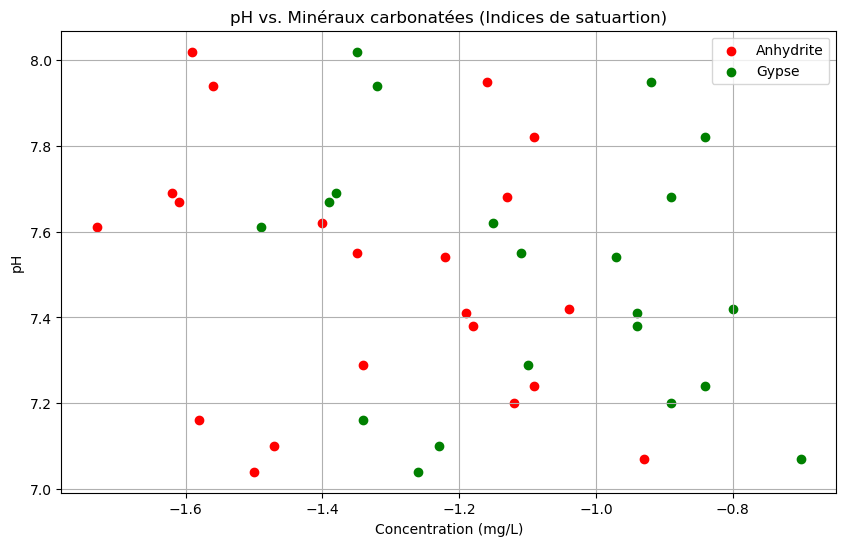

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path
file_path = 'C:/Users/PAVILION/Desktop/Examen2024.xlsx'

# Read the sheet "Indices de satuartion" from Excel file
df_indices = pd.read_excel(file_path, sheet_name='Indices de satuartion')

# Display the first few rows of the dataframe to verify
print(df_indices.head())

# Assuming 'pH' and minerals columns exist in df_indices, you can plot the scatter plot
# Adjust plotting as per your specific columns in df_indices
if 'pH' in df_indices.columns and all(mineral in df_indices.columns for mineral in ['Calcite', 'Aragonite', 'Dolomite']):
    plt.figure(figsize=(10, 6))

    plt.scatter(df_indices['Anhydrite'], df_indices['pH'], color='r', label='Anhydrite')
    plt.scatter(df_indices['Gypse'], df_indices['pH'], color='g', label='Gypse')
    

    plt.xlabel('Concentration (mg/L)')
    plt.ylabel('pH')
    plt.title('pH vs. Minéraux carbonatées (Indices de satuartion)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Required columns ('pH', 'Calcite', 'Aragonite', 'Dolomite') not found in the sheet 'Indices de satuartion'.")


In [12]:
# Assurez-vous que les colonnes nécessaires existent dans le DataFrame
required_columns = ['pH', 'Calcite', 'Aragonite', 'Dolomite']
if all(column in df3.columns for column in required_columns):
    # Tracer le graphique
    plt.figure(figsize=(10, 6))
	

    plt.scatter(df3['Anhydrite'], df3['pH'], color='r', label='Anhydrite')
    plt.scatter(df3['Gypse'], df3['pH'], color='g', label='Gypse')

    plt.xlabel('Concentration (mg/L)')
    plt.ylabel('pH')
    plt.title('Scatter Plot of pH vs. Mineral Concentrations')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Les colonnes nécessaires ne sont pas présentes dans le fichier Excel.")

Les colonnes nécessaires ne sont pas présentes dans le fichier Excel.


In [13]:


  plt.scatter(df3['Anhydrite'], df3['pH'], color='r', label='Anhydrite')
    plt.scatter(df3['Gypse'], df3['pH'], color='g', label='Gypse')

df = pd.DataFrame(df3)

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.scatter(df3['Anhydrite'], df3['pH'], color='r', label='Anhydrite')
plt.scatter(df3['Gypse'], df3['pH'], color='g', label='Gypse')

plt.xlabel('Concentration (mg/L)')
plt.ylabel('pH')
plt.title('Scatter Plot of pH vs. Mineral Concentrations')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'Anhydrite'

<Figure size 1000x600 with 0 Axes>